In [ ]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

# Упражнение 11.1

Была проверена работа примеров в блокноте chap11.ipynb

# Упражнение 11.2

Было просмотрено видео «D/A and A/D | Digital Show and Tell. Оно демонстрирует теорему о выборках в действии, и представляет множество другой информации о выборках.

https://www.youtube.com/watch?v=cIQ9IXSUzuM

# Упражение 11.3

При взятии выборок из сигнала при слишком
низкой частоте кадров составляющие, больше частоты заворота дадут биения. В таком случае эти компоненты не отфильтруешь, поскольку они неотличимы от более низких частот.

Полезно отфильтровать эти частоты до выборки; фильтр НЧ, используемый для этой цели, называется *фильтр сглаживания*.

Для примера «Соло на барабане» был применён фильтр НЧ
до выборки. Затем, опять же с помощью фильтра НЧ, были удалены спектральные копии, вызванные выборкой.


In [ ]:
if not os.path.exists('263868__kevcio__amen-break-a-160-bpm.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/263868__kevcio__amen-break-a-160-bpm.wav

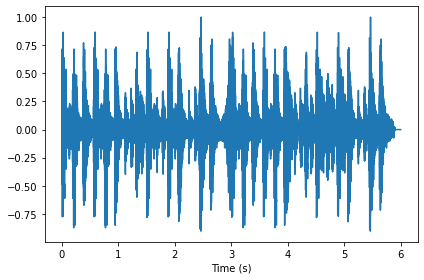

In [ ]:
from thinkdsp import read_wave, decorate
wave = read_wave('263868__kevcio__amen-break-a-160-bpm.wav')
wave.normalize()
wave.plot()
decorate(xlabel='Time (s)')

In [ ]:
wave.make_audio()

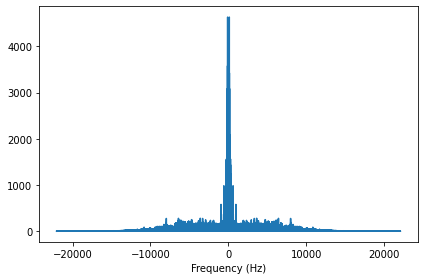

In [ ]:
spectrum = wave.make_spectrum(full=True)
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

In [ ]:
factor = 4
framerate = wave.framerate / factor
cutoff = framerate / 2
cutoff

5512.5

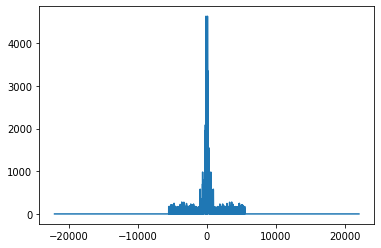

In [ ]:
spectrum.low_pass(cutoff)
spectrum.plot()

In [ ]:
prefiltered = spectrum.make_wave()
prefiltered.make_audio()

In [ ]:
from thinkdsp import Wave
import numpy as np

def sample(wave, factor):
    ys = np.zeros(len(wave))
    ys[::factor] = np.real(wave.ys[::factor])
    return Wave(ys, framerate=wave.framerate) 

In [ ]:
sampled = sample(prefiltered, factor)
sampled.make_audio()

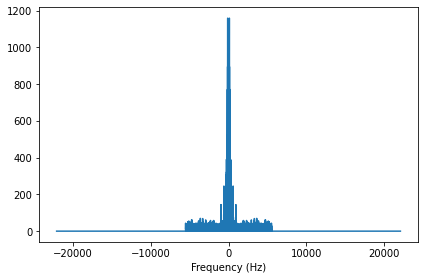

In [ ]:
spectrum = sampled.make_spectrum(full=True)
spectrum.low_pass(5512.5)
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

In [ ]:
filtered = spectrum.make_wave()
filtered.normalize()
filtered.make_audio()

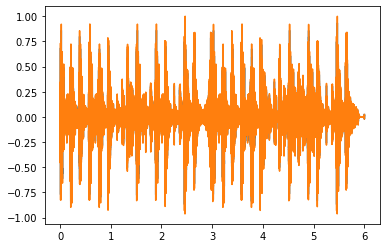

In [ ]:
prefiltered.plot()
filtered.plot()

Полученный результат идентичен отфильтрованному сигналу.
